### Dimensionality and its Reduction

#### SDSS Spectra Example

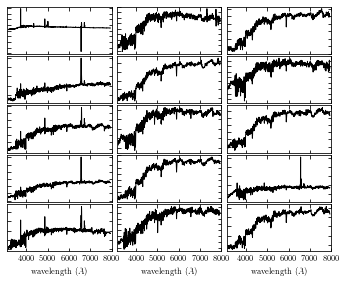

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import sdss_corrected_spectra

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# Use pre-computed PCA to reconstruct spectra
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
lam = sdss_corrected_spectra.compute_wavelengths(data)

# select random spectra
np.random.seed(5)
nrows = 5
ncols = 3
ind = np.random.randint(spectra.shape[0], size = nrows * ncols)
spec_sample = spectra[ind]

# Plot the results
fig = plt.figure(figsize = (5, 4))

fig.subplots_adjust(left = 0.05, right=0.95, wspace = 0.05,
                   bottom=0.1, top=0.95, hspace=0.05)

for i in range(ncols):
    for j in range(nrows):
        ax = fig.add_subplot(nrows, ncols, ncols * j + 1 + i)
        ax.plot(lam, spec_sample[ncols * j + i], '-k', lw=1)
        ax.set_xlim(3100, 7999)

        ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        if j < nrows - 1:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            plt.xlabel(r'wavelength $(\AA)$')

        ylim = ax.get_ylim()
        dy = 0.05 * (ylim[1] - ylim[0])
        ax.set_ylim(ylim[0] - dy, ylim[1] + dy)

plt.show()


### Scematic Diagram of PCA

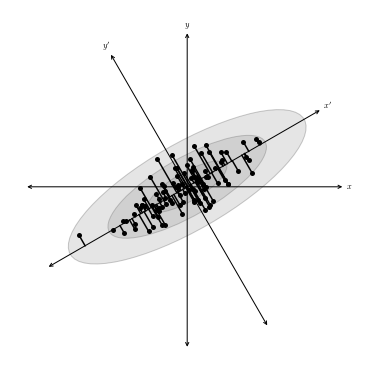

In [4]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse


if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# Set parameters and draw the random sample
np.random.seed(42)
r = 0.9

sigma1 = 0.25
sigma2 = 0.08
rotation = np.pi / 6
s = np.sin(rotation)
c = np.cos(rotation)

X = np.random.normal(0, [sigma1, sigma2], size = (100, 2)).T
R = np.array([[c, -s],
             [s, c]])
X = np.dot(R, X)

# Plot the diagram
fig = plt.figure(figsize = (5, 5), facecolor = 'w')
ax = plt.axes((0, 0, 1, 1), xticks = [], yticks = [], frameon = False)

# draw axes
ax.annotate(r'$x$', (-r, 0), (r, 0),
            ha='center', va='center',
            arrowprops=dict(arrowstyle='<->', color='k', lw=1))
ax.annotate(r'$y$', (0, -r), (0, r),
            ha='center', va='center',
            arrowprops=dict(arrowstyle='<->', color='k', lw=1))

# draw rotated axes
ax.annotate(r'$x^\prime$', (-r * c, -r * s), (r * c, r * s),
            ha='center', va='center',
            arrowprops=dict(color='k', arrowstyle='<->', lw=1))
ax.annotate(r'$y^\prime$', (r * s, -r * c), (-r * s, r * c),
            ha='center', va='center',
            arrowprops=dict(color='k', arrowstyle='<->', lw=1))

# scatter points
ax.scatter(X[0], X[1], s=25, lw=0, c='k', zorder=2)

# draw lines
vnorm = np.array([s, -c])
for v in (X.T):
    d = np.dot(v, vnorm)
    v1 = v - d * vnorm
    ax.plot([v[0], v1[0]], [v[1], v1[1]], '-k')

# draw ellipses
for sigma in (1, 2, 3):
    ax.add_patch(Ellipse((0, 0), 2 * sigma * sigma1, 2 * sigma * sigma2,
                         rotation * 180. / np.pi,
                         ec='k', fc='gray', alpha=0.2, zorder=1))

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

plt.show()

### Plot of visual representation of an SVD

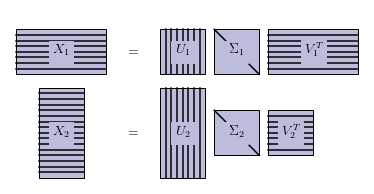

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle


if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# Define a function to create a rectangle
def labeled_rect(ax, center, width, height, text,
                stripe='vert', N=7, color='#BCBCDC'):
    left = center[0] - 0.5 * width
    bottom = center[1] - 0.5 * height
    ax.add_patch(Rectangle((left, bottom), width, height,
                          fill = True, color = color, ec = 'k'))
    
    ax.text(center[0], center[1], text,
           fontsize = 14, ha = 'center', va = 'center',
           bbox = dict(ec = color, fc = color))
    
    if stripe == 'vert':
        xlocs = np.linspace(center[0] - 0.5 * width,
                           center[0] + 0.5 * width,
                           N + 2)[1:-1]
        
        for x in xlocs:
            plt.plot([x, x],
                    [center[1] - 0.5 * height,
                    center[1] + 0.5 * height],
                    '-k')
                     
            
    elif stripe == 'horiz':
        ylocs = np.linspace(center[1] - 0.5 * height,
                           center[1] + 0.5 * height,
                           N + 2)[1:-1]
                     
        for y in ylocs:
            plt.plot([center[0] - 0.5 * width, center[0] + 0.5 * width], 
                              [y,y],'-k')
                     
    
    elif stripe == 'diag':
        plt.plot([center[0] - 0.5 * width, center[0] + 0.5 * width],
                [center[1] + 0.5 * height, center[1] - 0.5 * height], '-k')
                     
                     
    else:
         raise ValueError("unrecognized stripe type")
                     
                     
                     
                     
# Plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(left=0, bottom=0,
                    right=1, top=1)
ax = fig.add_subplot(111, xticks=[], yticks=[], frameon=False)

labeled_rect(ax, (0.3, 0.75), 0.5, 0.25, '$X_1$', 'horiz')
labeled_rect(ax, (0.975, 0.75), 0.25, 0.25, '$U_1$', 'vert')
labeled_rect(ax, (1.275, 0.75), 0.25, 0.25, r'$\Sigma_1$', 'diag')
labeled_rect(ax, (1.7, 0.75), 0.5, 0.25, r'$V_1^T$', 'horiz')

labeled_rect(ax, (0.3, 0.3), 0.25, 0.5, r'$X_2$', 'horiz', N=15)
labeled_rect(ax, (0.975, 0.3), 0.25, 0.5, r'$U_2$', 'vert')
labeled_rect(ax, (1.275, 0.3), 0.25, 0.25, r'$\Sigma_2$', 'diag')
labeled_rect(ax, (1.575, 0.3), 0.25, 0.25, r'$V_2^T$', 'horiz')

ax.text(0.7, 0.75, '$=$', fontsize=14, ha='center', va='center')
ax.text(0.7, 0.3, '$=$', fontsize=14, ha='center', va='center')

ax.set_xlim(0, 2)
ax.set_ylim(0, 1)

plt.show()

                              

### SDSS spectra Decomposition

@pickle_results: using precomputed results from 'spec_decompositions.pkl'


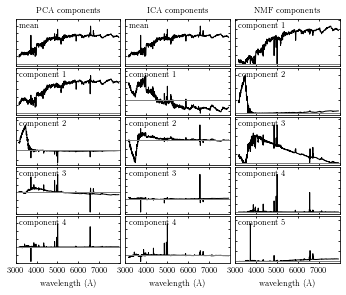

In [18]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.decomposition import NMF, FastICA, PCA

from astroML.datasets import sdss_corrected_spectra
from astroML.utils.decorators import pickle_results


if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# Download data
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

# Compute PCA, ICA and NMF componenets
# Saving the results using pickle decorators
@pickle_results('spec_decompositions.pkl')
def compute_PCA_ICA_NMF(n_components=5):
    spec_mean = spectra.mean(0)
    
    #PCA: use randomize PCA for speed
    pca = PCA(n_components - 1, random_state = 0, svd_solver = 'randomized')
    pca.fit(spectra)
    pca_comp = np.vstack([spec_mean, 
                         pca.components_])
    
    # NMF requires all elements of the input to be greater than zero
    spectra[spectra < 0] = 0
    nmf = NMF(n_components, random_state = 0)
    nmf.fit(spectra)
    nmf_comp = nmf.components_
    
    return pca_comp, ica_comp, nmf_comp

n_components = 5
decompositions = compute_PCA_ICA_NMF(n_components)

# Plot the results
fig = plt.figure(figsize = (5, 4))
fig.subplots_adjust(left=0.05, right= 0.95, wspace=0.05, 
                   bottom = 0.1, top=0.95, hspace = 0.05)

titles = ['PCA components', 'ICA components', 'NMF components']

for i, comp in enumerate(decompositions):
    for j in range(n_components):
        ax = fig.add_subplot(n_components, 3, 3 * j + 1 + i)

        ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        if j < n_components - 1:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            ax.xaxis.set_major_locator(
                plt.FixedLocator(list(range(3000, 7999, 1000))))
            ax.set_xlabel(r'wavelength ${\rm (\AA)}$')

        ax.plot(wavelengths, comp[j], '-k', lw=1)

        # plot zero line
        xlim = [3000, 8000]
        ax.plot(xlim, [0, 0], '-', c='gray', lw=1)

        if j == 0:
            ax.set_title(titles[i])

        if titles[i].startswith('PCA') or titles[i].startswith('ICA'):
            if j == 0:
                label = 'mean'
            else:
                label = 'component %i' % j
        else:
            label = 'component %i' % (j + 1)

        ax.text(0.03, 0.94, label, transform=ax.transAxes,
                ha='left', va='top')

        for l in ax.get_xticklines() + ax.get_yticklines():
            l.set_markersize(2)

        # adjust y limits
        ylim = plt.ylim()
        dy = 0.05 * (ylim[1] - ylim[0])

        ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)
        ax.set_xlim(xlim)


plt.show()


### SDSS Eignevalues 

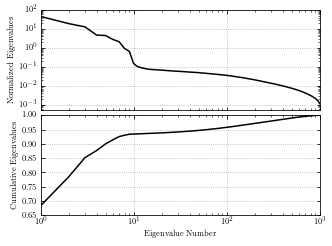

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from astroML import datasets

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# Load data
data = datasets.fetch_sdss_corrected_spectra()
spectra = datasets.sdss_corrected_spectra.reconstruct_spectra(data)

# Eigenvalues 
evals = data['evals'] ** 2
evals_cs = evals.cumsum()
evals_cs /= evals_cs[-1]

# plot the eigenvalues
fig = plt.figure(figsize = (5, 3.75))
fig.subplots_adjust(hspace=0.05, bottom = 0.12)

ax = fig.add_subplot(211, xscale='log', yscale='log')
ax.grid()
ax.plot(evals, c='k')
ax.set_ylabel('Normalized Eigenvalues')
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_ylim(5E-4, 100)

ax = fig.add_subplot(212, xscale='log')
ax.grid()
ax.semilogx(evals_cs, color='k')
ax.set_xlabel('Eigenvalue Number')
ax.set_ylabel('Cumulative Eigenvalues')
ax.set_ylim(0.65, 1.00)

plt.show()

### PCA Reconstruction of the Spectra

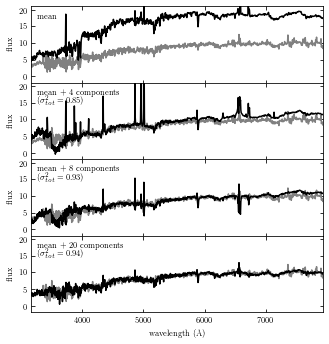

In [26]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA

from astroML.datasets import sdss_corrected_spectra
from astroML.utils.decorators import pickle_results


if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


# Download Data
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelenghts = sdss_corrected_spectra.compute_wavelengths(data)

# PCA

evals = data['evals'] ** 2
evals_cs = evals.cumsum()
evals_cs /= evals_cs[-1]
evecs = data['evecs']
spec_mean = spectra.mean(0)

# Find the coefficients of a particular spectrum
spec = spectra[2]
coeff = np.dot(evecs, spec - spec_mean)

# Plot the sequence of reconstructions
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

for i, n in enumerate([0, 4, 8, 20]):
    ax = fig.add_subplot(411 + i)
    ax.plot(wavelengths, spec, '-', c='gray')
    ax.plot(wavelengths, spec_mean + np.dot(coeff[:n], evecs[:n]), '-k')

    if i < 3:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylim(-2, 21)
    ax.set_ylabel('flux')

    if n == 0:
        text = "mean"
    elif n == 1:
        text = "mean + 1 component\n"
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
    else:
        text = "mean + %i components\n" % n
        text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

    ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes)

fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
plt.show()


### SDSS Reconstruction from Eigenspectra

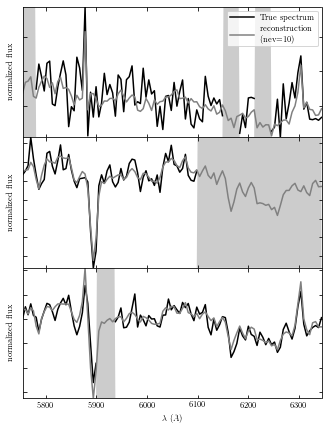

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker

from astroML.datasets import fetch_sdss_corrected_spectra
from astroML.datasets import sdss_corrected_spectra

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# Get spectra and eigenvectors used to reconstruct them
data = fetch_sdss_corrected_spectra()
spec = sdss_corrected_spectra.reconstruct_spectra(data)
lam = sdss_corrected_spectra.compute_wavelengths(data)
evecs = data['evecs']
mu = data['mu']
norms = data['norms']
mask = data['mask']

# Plot the results
i_plot = ((lam > 5750) & (lam < 6350))
lam = lam[i_plot]

specnums = [20, 8, 9]
subplots = [311, 312, 313]

fig = plt.figure(figsize = (5, 6.25))
fig.subplots_adjust(left=0.09, bottom=0.08, hspace=0, right=0.92, top=0.95)

for subplot, i in zip(subplots, specnums):
    ax = fig.add_subplot(subplot)
    
    # compute eigen-coefficients
    spec_i_centered = spec[i] / norms[i] - mu
    coeffs = np.dot(spec_i_centered, evecs.T)
    
    # blank out masked regions
    spec_i = spec[i]
    mask_i = mask[i]
    spec_i[mask_i] = np.nan
    
    # plt the raw masked spectrum
    ax.plot(lam, spec_i[i_plot], '-', color = 'k',
           label = 'True spectrum', lw = 1.5)
    
    # plot two levels of reconstruction
    for nev in [10]:
        if nev == 0:
            label = 'mean'
        else:
            label = 'reconstruction\n(nev=%i)' % nev
        spec_i_recons = norms[i] * (mu + np.dot(coeffs[:nev], evecs[:nev]))
        ax.plot(lam, spec_i_recons[i_plot], label=label, color='grey')

    # plot shaded background in masked region
    ylim = ax.get_ylim()
    mask_shade = ylim[0] + mask[i][i_plot].astype(float) * ylim[1]
    plt.fill(np.concatenate([lam[:1], lam, lam[-1:]]),
             np.concatenate([[ylim[0]], mask_shade, [ylim[0]]]),
             lw=0, fc='k', alpha=0.2)

    ax.set_xlim(lam[0], lam[-1])
    ax.set_ylim(ylim)
    ax.yaxis.set_major_formatter(ticker.NullFormatter())

    if subplot == 311:
        ax.legend(loc=1)

    ax.set_xlabel('$\lambda\ (\AA)$')
    ax.set_ylabel('normalized flux')

plt.show()

### Comparison of PCA and Manifold Learning

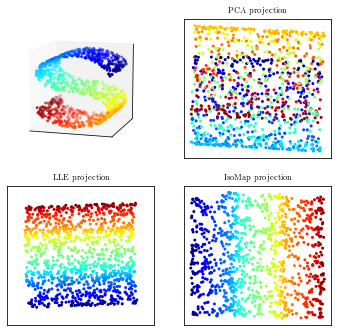

In [34]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import ticker

from sklearn import manifold, datasets, decomposition

from sklearn.datasets import samples_generator


if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# Generate the S-curve dataset
np.random.seed(0)

n_points = 1100
n_neighbors = 10
out_dim = 2

X, color = datasets.samples_generator.make_s_curve(n_points)

# change the propotions to emphasize the weakness of PCA
X[:, 1] -= 1
X[:, 1] *= 1.5
X[:, 2] *= 0.5

# Compute the projections
pca = decomposition.PCA(out_dim)
Y_pca = pca.fit_transform(X)

lle = manifold.LocallyLinearEmbedding(n_neighbors, out_dim, method='modified',
                                    random_state = 0, eigen_solver = 'dense')

Y_lle = lle.fit_transform(X)

iso = manifold.Isomap(n_neighbors, out_dim)
Y_iso = iso.fit_transform(X)

# Plot the 3D dataset
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(left = 0.05, right = 0.95,
                   bottom = 0.05, top = 0.9)

try:
    # matplotlib 1.0+ has a toolkit for generating 3D plots
    from mpl_toolkits.mplot3d import Axes3D
    ax1 = fig.add_subplot(221, projection = '3d',
                         xticks = [], yticks = [], zticks = [])
    ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c= color,
               cmap = plt.cm.jet, s=9, lw = 0)
    ax1.view_init(11, -73)
    
except:
    # In older versions, we'll have to wing it with a 2D plot
    ax1 = fig.add_subplot(221)
    
    # Create a projection to mimic 3D scatter-plot
    X_proj = X / (X.max(0) - X.min(0))
    X_proj -= X_proj.mean(0)
    R = np.array([[0.5, 0.0],
                  [0.1, 0.1],
                  [0.0, 0.5]])
    R /= np.sqrt(np.sum(R ** 2, 0))
    X_proj = np.dot(X_proj, R)

    # change line width with depth
    lw = X[:, 1].copy()
    lw -= lw.min()
    lw /= lw.max()
    lw = 1 - lw

    ax1.scatter(X_proj[:, 0], X_proj[:, 1], c=color,
                cmap=plt.cm.jet, s=9, lw=lw, zorder=10)

    # draw the shaded axes
    ax1.fill([-0.7, -0.3, -0.3, -0.7, -0.7],
             [-0.7, -0.3, 0.7, 0.3, -0.7], ec='k', fc='#DDDDDD', zorder=0)
    ax1.fill([-0.3, 0.7, 0.7, -0.3, -0.3],
             [-0.3, -0.3, 0.7, 0.7, -0.3], ec='k', fc='#DDDDDD', zorder=0)
    ax1.fill([-0.7, 0.3, 0.7, -0.3, -0.7],
             [-0.7, -0.7, -0.3, -0.3, -0.7], ec='k', fc='#DDDDDD', zorder=0)

    ax1.xaxis.set_major_locator(ticker.NullLocator())
    ax1.yaxis.set_major_locator(ticker.NullLocator())

#------------------------------------------------------------
# Plot the projections
subplots = [222, 223, 224]
titles = ['PCA projection', 'LLE projection', 'IsoMap projection']
Yvals = [Y_pca, Y_lle, Y_iso]

for (Y, title, subplot) in zip(Yvals, titles, subplots):
    ax = fig.add_subplot(subplot)
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.jet, s=9, lw=0)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

### PCA Projection of SDSS Spectra

@pickle_results: computing results and saving to 'spec_LLE.pkl'
- finished LLE projection
 - removing 33 outliers for plot


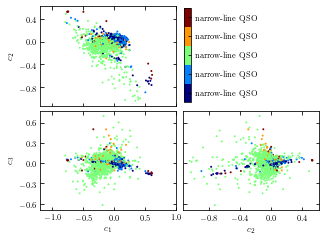

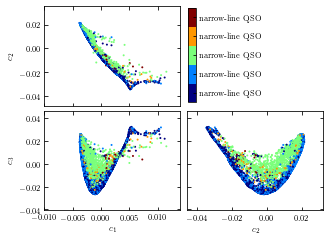

In [44]:

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt
from sklearn import manifold, neighbors

from astroML.datasets import sdss_corrected_spectra
from astroML.datasets import fetch_sdss_corrected_spectra
from astroML.plotting.tools import discretize_cmap
from astroML.utils.decorators import pickle_results

if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

# Set up color-map properties
clim = (1.5, 6.5)
cmap = discretize_cmap(plt.cm.jet, 5)
cdict = ['unknown', 'star', 'absorption galaxy',
         'galaxy', 'emission galaxy',
         'narrow-line QSO', 'broad-line QSO']
cticks = [2, 3, 4, 5, 6]
formatter = plt.FuncFormatter(lambda t, *args: cdict[int(np.round(5))])

# Fetch the data: PCA coefficients have been pre-computed
data = fetch_sdss_corrected_spectra()
coeffs_PCA = data['coeffs']
c_PCA  = data['lineindex_cln']
spec = sdss_corrected_spectra.reconstruct_spectra(data)
color = data['lineindex_cln']

# Compute the LLE projection: save the results
@pickle_results("spec_LLE.pkl")
def compute_spec_LLE(n_neighbors=10, out_dim = 3):
    # Compute the LLE projection
    LLE = manifold.LocallyLinearEmbedding(n_neighbors, out_dim, 
                                          method = 'modified',
                                          eigen_solver = 'dense')
    Y_LLE = LLE.fit_transform(spec)
    print("- finished LLE projection")
    
    # remove outliers for the plot
    BT = neighbors.BallTree(Y_LLE)
    dist, ind = BT.query(Y_LLE, n_neighbors)
    dist_to_n = dist[:, -1]
    dist_to_n -= dist_to_n.mean()
    std = np.std(dist_to_n)
    flag = (dist_to_n > 0.25 * std)
    print(" - removing {0} outliers for plot".format(flag.sum()))
    
    return Y_LLE[~flag], color[~flag]

coeffs_LLE, c_LLE = compute_spec_LLE(10, 3)

# Plots the results:
# Plot the results:
for (c, coeffs, xlim) in zip([c_PCA, c_LLE],[coeffs_PCA, coeffs_LLE],[(-1.2, 1.0), (-0.01, 0.014)]):
    fig = plt.figure(figsize=(5, 3.75))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)

    # axes for colorbar
    cax = plt.axes([0.525, 0.525, 0.02, 0.35])

    # Create scatter-plots
    scatter_kwargs = dict(s=4, lw=0, edgecolors='none', c=c, cmap=cmap)

    ax1 = plt.subplot(221)
    im1 = ax1.scatter(coeffs[:, 0], coeffs[:, 1], **scatter_kwargs)
    im1.set_clim(clim)
    ax1.set_ylabel('$c_2$')

    ax2 = plt.subplot(223)
    im2 = ax2.scatter(coeffs[:, 0], coeffs[:, 2], **scatter_kwargs)
    im2.set_clim(clim)
    ax2.set_xlabel('$c_1$')
    ax2.set_ylabel('$c_3$')

    ax3 = plt.subplot(224)
    im3 = ax3.scatter(coeffs[:, 1], coeffs[:, 2], **scatter_kwargs)
    im3.set_clim(clim)
    ax3.set_xlabel('$c_2$')

    fig.colorbar(im3, ax=ax3, cax=cax,
                 ticks=cticks,
                 format=formatter)

    ax1.xaxis.set_major_formatter(plt.NullFormatter())
    ax3.yaxis.set_major_formatter(plt.NullFormatter())

    ax1.set_xlim(xlim)
    ax2.set_xlim(xlim)

    for ax in (ax1, ax2, ax3):
        ax.xaxis.set_major_locator(plt.MaxNLocator(5))
        ax.yaxis.set_major_locator(plt.MaxNLocator(5))

plt.show()
